In [ ]:
pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.3 MB/s eta 0:00:00


In [ ]:
pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 15.4 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
df = pd.read_excel('/content/UTSDataset (5).xlsx')

Hasil Preprocessing Jawaban 1:
0     teknik sisip informasi pesan protokol kontrol ...
1     steganografi protokol seni sembunyi informasi ...
2     protocol steganografi acu teknik sisip informa...
3     steganografi protokol seni ilmu menyisipkanmen...
4     steganografi protokol teknik sisip informasi r...
5                             ilmu sembunyi pesan media
6     steganografi seni ilmu sembunyi pesan media ki...
7     asteganografi protokol seni ilmu sembunyi pesa...
8                             ilmu sembunyi pesan media
9     seni ilmu sembunyi pesan media kirim terima er...
10    protokol steganografi rujuk teknik tuju sisip ...
11    stegano protokol acu teknik sisip informasi pe...
12    seni ilmu sembunyi pesan media kirim terima er...
13    seni ilmu sembunyi pesan media kirim terima er...
14    protocol steganografi acu teknik sisip informa...
15    steganografi protokol acu teknik sisip informa...
16    steganografi teknik sembunyi data rahasia samp...
17    steganorafi

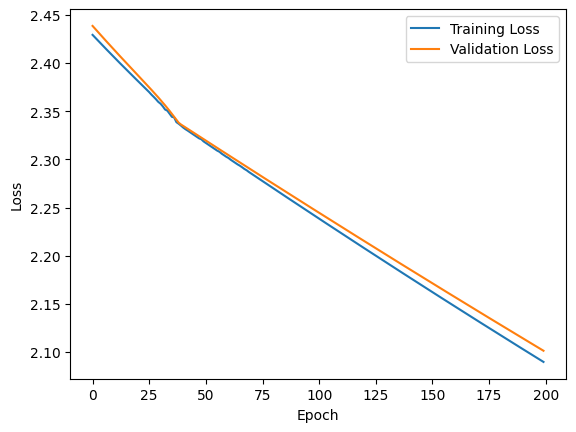

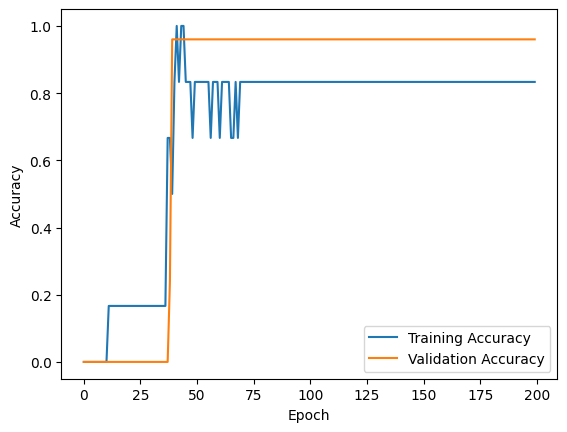

In [ ]:
# IMPORT LIBRARY
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPooling1D, Flatten, Dropout,SpatialDropout1D,Reshape
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras import regularizers
import re
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

stopwords = nltk.corpus.stopwords.words('indonesian')

# Memisahkan kolom jawaban dan label
df['Jawaban 1'] = df['Jawaban 1'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df['Jawaban 1'] = df['Jawaban 1'].str.lower()
df['Jawaban 1'] = df['Jawaban 1'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split() if word not in stopwords]))
jawaban1 = df['Jawaban 1'].values
# Menampilkan hasil preprocessing
print("Hasil Preprocessing Jawaban 1:")
print(df['Jawaban 1'])
# Tokenisasi teks jawaban

tokenizer1 = Tokenizer(num_words=50000)
tokenizer1.fit_on_texts(jawaban1)
max_length = 100
jawaban_sequences1 = tokenizer1.texts_to_sequences(jawaban1)
print("jawaban sequences 1=" , jawaban_sequences1)
label1 = df['nilai 1'].values
from gensim.models import Word2Vec

# Menggabungkan semua kalimat ke dalam satu daftar
all_sentences_1 = [sentence.split() for sentence in tokenizer1.word_index]
# Melatih model Word2Vec
word2vec_model1 = Word2Vec(sentences=all_sentences_1, vector_size=100, window=5, min_count=1, workers=4)
# Konversi teks ke vektor numerik
jawaban_sequences_1 = []
for sentence in all_sentences_1:
    sequence = []
    for word in sentence:
        if word in word2vec_model1.wv:
            sequence.append(word2vec_model1.wv[word])
    jawaban_sequences_1.append(sequence)
print(all_sentences_1)
print("Hasil Proses Jawaban 1:")
for seq in jawaban_sequences_1:
    print(seq)
    break
# Menentukan panjang maksimum sekuens vektor
max_length_1 = max(len(seq1) for seq1 in jawaban_sequences_1)

# Padding sequence agar memiliki panjang yang sama dengan cycling
jawaban_padded_1 = []
for seq in jawaban_sequences_1:
    if len(seq) < max_length_1:
        padded_seq = np.pad(seq, ((0, max_length_1 - len(seq)), (0, 0)), mode='constant')
        padded_seq = padded_seq[:max_length_1]  # Mengambil panjang maksimum
    else:
        padded_seq = seq[:max_length_1]
    jawaban_padded_1.append(padded_seq)

# Memastikan panjang sekuens tetap 25 dengan cycling
jawaban_padded1 = np.array(jawaban_padded_1)
if jawaban_padded1.shape[1] < 25:
    repetitions = 25 // jawaban_padded1.shape[1]
    remainder = 25 % jawaban_padded1.shape[1]
    jawaban_padded1 = np.concatenate([jawaban_padded1] * repetitions, axis=1)
    jawaban_padded1 = np.concatenate([jawaban_padded1, jawaban_padded1[:, :remainder]], axis=1)
jawaban_padded1 = jawaban_padded1[:, :25, :100]  # Mengambil 25 sekuens pertama dengan vektor dimensi 100

# Menampilkan hasil padding
print(jawaban_padded1.shape)
print(jawaban_padded1)
print("Hasil Padding Jawaban 1:")
print(jawaban_padded1)
print(jawaban_padded1.shape)

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

# Input data shapes
input_shape = (jawaban_padded1.shape[1], jawaban_padded1.shape[2])

# Preprocess data and labels
indices = np.arange(len(label1))
indices_train, indices_test, y_train, y_test, index_train, index_test = train_test_split(indices, label1, indices, test_size=0.8, random_state=42)
X_train, X_test = jawaban_padded1[indices_train], jawaban_padded1[indices_test]
y_train = to_categorical(y_train/10, 11)
y_test = to_categorical(y_test/10, 11)

# Model architecture
model = Sequential()
model.add(Conv1D(150, 5, activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(100, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(3, 3, activation='relu'))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.add(Flatten())
model.add(Dense(3,activation='relu')) #hidden layer
model.add(Dense(2,activation='relu')) #hidden laye
model.add(Dense(11,activation='softmax'))

# Set the learning rate
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

# Model compilation
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model training
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32)

# Model evaluation
loss, acc = model.evaluate(X_test, y_test)
print('Loss:', loss)
print('Accuracy:', acc)

# Predictions
y_pred = model.predict(X_test)

for i in range(len(y_pred)):
    original_index = indices_test[i]
    nama = df.loc[original_index, 'Nama']
    nim = df.loc[original_index, 'NIM']
    nilai_real = np.argmax(y_test[i, :])
    nilai_prediksi = np.argmax(y_pred[i])

    print('Nama Mahasiswa:', nama)
    print('NIM Mahasiswa:', nim)
    print('Nilai Real:', nilai_real)
    print('Nilai Prediksi:', nilai_prediksi)

    print('Nilai real:', nilai_real)
    print('Nilai predik:', nilai_prediksi)
    print('\n')

# Plotting the training loss and accuracy
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

